In [1]:
try; splice!(Base.LOAD_CACHE_PATH, 3); end
try; Pkg.add("Compose"); end
try; Pkg.add("Color"); end
try; Pkg.add("Interact"); end
try; Pkg.add("Cairo"); end;

INFO: Nothing to be done
INFO: Nothing to be done
INFO: Nothing to be done
INFO: Nothing to be done


In [3]:
Pkg.build("Cairo")

INFO: Building Cairo


In [30]:
module showHorn
using Compose
using Colors

function horn_lims(l::Tuple{Real, Real}, radius::Real, opening::Real, weights::Tuple{Real, Real}, v::Real)
  a1, a2 = weights
  l1, l2 = l
  
  minx1 = a1*v^(1/l1)
  maxx1 = a1*(1+opening)*v^(1/l1)
  
  minx2 = a2*v^(1/l2)
  maxx2 = a2*((1+opening)*v)^(1/l2)
  
  return (minx1, minx2), (maxx1, maxx2)
end

function horn_line(minpt::Tuple{Real, Real}, maxpt::Tuple{Real, Real})
  line([minpt, maxpt])
end
horn_line(pts::Tuple{Tuple{Real, Real}, Tuple{Real, Real}}) = horn_line(first(pts), last(pts))
function make_horn_plot(h::Real, N::Int = 100; 
    l::Tuple{Real, Real} = (0.5, 0.5),
    radius::Real = 0.2,
    opening::Real = 0.1,
    weights::Tuple{Real, Real} = (1, 1))
  findlim(v) = horn_lims(l, radius, opening, weights, v)
  vvals = linspace(h/N, h, N)
  compose(compose(context(), map(horn_line, map(findlim, vvals))...))
end
function compose_horn_plot(h::Real, N::Int = 100; 
    l::Tuple{Real, Real} = (0.5, 0.5),
    radius::Real = 0.2,
    opening::Real = 0.1,
    weights::Tuple{Real, Real} = (1, 1))
    hornplot = make_horn_plot(h, N, l = l, radius = radius, opening = opening, weights = weights)
    compose(hornplot, stroke(colorant"black"), linewidth(20/N*mm), fill(nothing)) 
end
function draw_horn_plot(h::Real, N::Int = 100, filetype::Symbol = :svg; 
    l::Tuple{Real, Real} = (0.5, 0.5),
    radius::Real = 0.2,
    opening::Real = 0.1,
    weights::Tuple{Real, Real} = (1, 1))
    hornplot = compose_horn_plot(h, N, l = l, radius = radius, opening = opening, weights = weights)
  if filetype == :svg
    imgout = SVG("hornplot.svg", 10cm, 10cm)
  elseif filetype == :pdf
    imgout = PDF("hornplot.pdf", 10cm, 10cm)
  elseif filetype == :svgjs || filetype == :js
    imgout = SVGJS("hornplot.js", 10cm, 10cm)
  end
    draw(imgout, hornplot)
end
end # module

showHorn

In [25]:
using Interact

    writemime(Base.IO, Base.Multimedia.MIME, Reactive.Signal) at /home/juser/.julia/v0.5/Interact/src/IJulia/setup.jl:103
is ambiguous with: 
    writemime(Base.IO, Base.Multimedia.MIME{:text/csv}, Any) at datafmt.jl:626.
To fix, define 
    writemime(Base.IO, Base.Multimedia.MIME{:text/csv}, Reactive.Signal)
before the new definition.
    writemime(Base.IO, Base.Multimedia.MIME, Reactive.Signal) at /home/juser/.julia/v0.5/Interact/src/IJulia/setup.jl:103
is ambiguous with: 
    writemime(Base.IO, Base.Multimedia.MIME{:text/tab-separated-values}, Any) at datafmt.jl:627.
To fix, define 
    writemime(Base.IO, Base.Multimedia.MIME{:text/tab-separated-values}, Reactive.Signal)
before the new definition.


Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"l1",0.5,linspace(0.0,1.0,5),true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"l2",0.5,linspace(0.0,1.0,5),true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"radius",0.5,linspace(0.0,1.0,5),true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"opening",0.5,linspace(0.0,1.0,5),true)

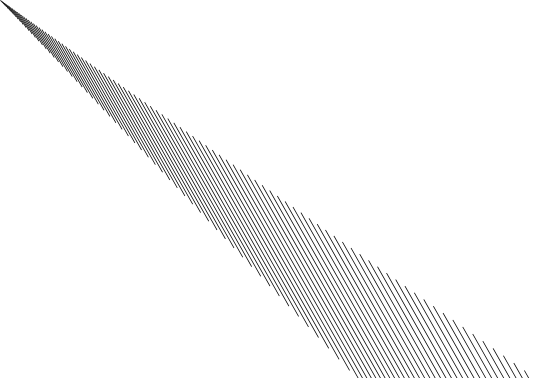

In [31]:
zeroonerange = linspace(0,1,5)
@manipulate for l1 = zeroonerange, l2 = zeroonerange, radius = zeroonerange, opening = zeroonerange
    showHorn.compose_horn_plot(1, 100, l=(l1, l2), radius=radius, opening=opening)
end